# Stock Price Prediction Model

## Applications of the Stock Price Prediction Model

**The stock price prediction model developed in this project holds significant potential for various real-world applications. Its accurate forecasting capabilities can provide valuable insights to investors, traders, and financial institutions, aiding them in making informed decisions regarding stock market activities. Here are some key applications of the model:**

- **Investment Strategy Optimization:** *By leveraging the predicted future closing prices, investors can devise optimized investment strategies. The model's forecasts can help determine the timing and direction of investments, enabling individuals or organizations to make well-informed decisions about buying, selling, or holding stocks.*

- **Risk Management and Portfolio Diversification:** *The model's predictions can contribute to effective risk management strategies. Investors can assess potential risks associated with specific stocks or portfolios by analyzing the forecasted price movements. This information can guide the diversification of investment portfolios, reducing the overall risk exposure.*

- **Trading Algorithm Development:** *High-frequency traders and algorithmic trading systems can benefit from incorporating the model's predictions. By integrating the forecasted closing prices into trading algorithms, traders can automate their decision-making processes, optimizing trade execution and potentially enhancing trading performance.*

- **Financial Planning and Decision-Making:** *The stock price prediction model can aid financial analysts, wealth managers, and individual investors in developing comprehensive financial plans. Accurate forecasts facilitate long-term financial projections, enabling better decision-making regarding retirement planning, savings strategies, and investment allocations.*

- **Market Analysis and Research:** *The model's predictions can serve as a valuable tool for conducting market analysis and research. Analysts can use the forecasted closing prices to identify patterns, trends, and anomalies in the stock market, supporting the formulation of insightful research reports and investment recommendations.*

*In summary, the stock price prediction model has diverse applications across the financial industry, empowering investors and professionals with valuable insights for optimizing investment strategies, managing risk, and making informed decisions. Its integration into various financial tools and systems can potentially enhance performance and contribute to more accurate and efficient decision-making processes.*

## Step 1: Data Analysis and Preprocessing
-  First we import the data and study the data.
-  Once we have a good idea of the data, we need to process the data before inserting it into a model
-  The main libraries used for data analysis is pandas and numpy

In [1]:
import numpy as np                                          # importing the neccessary libraries to analyse and process data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Stock_Price_Dataset.csv')               # Importing the data using pandas.read_csv
data.head()                                                 # Printing the top 5 values.

Date        Open        High         Low       Close   Adj Close   
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  \
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

In [3]:
data.describe()                                             # data.describe gives statistical information about the data.

Open         High          Low        Close    Adj Close   
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000  \
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [4]:
data.info()                                                 # data.info is used to get the datatypes and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
data.isnull().any()                                         # data.isnull().any() is used to check if there are any null values

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
data['Date'] = pd.to_datetime(data['Date'])                 # Converting object datatype to datetime format

In [7]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### Conclusion: 
- From the above section, we got to know...
  - The data has 7 columns, 
       - Date : The date of the data
       - Open : The opening price of the stock
       - High : The highest price of the stock for the day
       - Low  : The lowest price of the stock for the day
       - Adj Close : The Adjacent close price of the stock for the day
       - Volumne : The volume of the stock for the day
       - Close : The closing price of the stock for the day.
  - We chose Open, High, Low, Volume as the features and Close as the Target.
  - We also found out the datatypes of all columns and converted object model of Date to datetime model.
  - On checking, there was no null values present in the dataset.

## Step 2: Visualizing the data
- It would be good for us to understand how the data is related to each other. Thus, we use matplotlib and seaborn to visualize the data
- a heatmap plot is a good representation of the correlation of the features of the dataset

In [8]:
plt.plot(data['Date'], data['Open'])                        # to understand the relation between open price and date, 
plt.xlabel('Dates')                                         # We use matplotlib to plot the graph between open price and date
plt.ylabel('Opening price')
plt.title('Open Price VS Date')
plt.show()

In [9]:
plt.plot(data['Date'], data['Close'])                       # to understand the relation between close price and date, 
plt.xlabel('Dates')                                         # We use matplotlib to plot the graph between close price and date
plt.ylabel('Closing price')
plt.title('Close Price VS Date')
plt.show()

In [10]:
plt.plot(data['Date'], data['High'])                        # to understand the relation between high price and date, 
plt.xlabel('Dates')                                         # We use matplotlib to plot the graph between high price and date
plt.ylabel('Highest price')
plt.title('High Price VS Date')
plt.show()

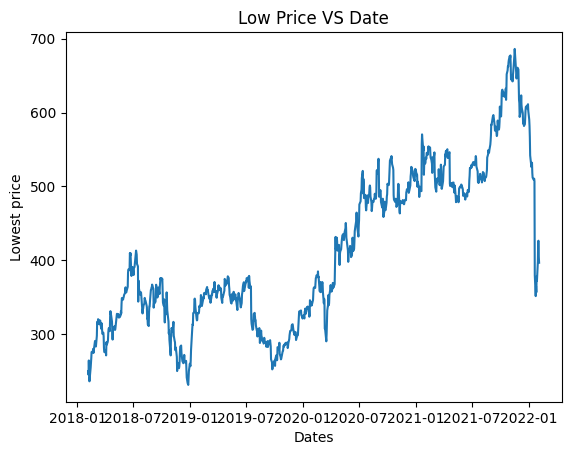

In [11]:
plt.plot(data['Date'], data['Low'])                         # to understand the relation between low price and date, 
plt.xlabel('Dates')                                         # We use matplotlib to plot the graph between low price and date
plt.ylabel('Lowest price')
plt.title('Low Price VS Date')
plt.show()

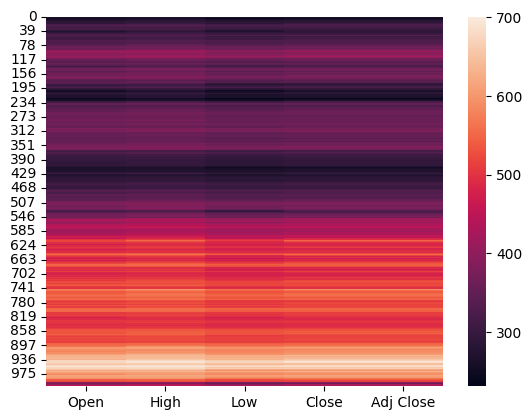

In [12]:
import seaborn as sns                                       # We will be using seaborn to plot the heatmap graph
ax = sns.heatmap(data.drop(['Date', 'Volume'], axis = 1))

### Conclusion:

- From the above section, we got to know,
    - All the features grow linearly in respect to time.
    - We can conclude to use a linear model for our dataset

## Step 3: Constructing the model
- From the above observed traits, we choose to use LinearRegression to make the model
- We will use sklearn to construct our model.
    - sklearn.model_selection.train_test_split for splitting the data
    - sklearn.linear_model.LinearRegression for the model itself.

In [13]:
from sklearn.model_selection import train_test_split        # sklearn.model_selection for splitting train and test cases
from sklearn.linear_model import LinearRegression           # sklearn.linear_model for training the train set

In [14]:
X = data[['Open', 'High', 'Low', 'Volume']].values          # Open, High, Low, Volume are the features.
y = data['Close'].values                                    # Close is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)    # 20% reserved for testing 

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)                              # fitting the training set to the model      

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    print(f'Accuracy: ', accuracy) 


In [17]:
y_pred = lr_model.predict(X_test)

metrics(y_pred, y_test)
accuracy(y_pred, y_test)

RMSE: 3.997117223269488
R_Squared value: 0.9986203720408963
Accuracy:  99.27761905017088


### Conclusion
- As demonstrated by the above scores, we could achieve 99.27% accuracy using the lineaer model
- We can also use other regression models and check if we can improve the accuracy.

## Step 4: Checking other regression models
- Normally, RandomForestRegressor gives a higher accuracy score.
- We can use it by importing it from sklearn.ensemble

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
rf_pred = rf_model.predict(X_test)

metrics(rf_pred, y_test)
accuracy(rf_pred, y_test)

RMSE: 5.264277655068572
R_Squared value: 0.9975985222354082
Accuracy:  99.06691813516558


### Conclusion
- The accuracy is lower than the linear regression model

# Final Conclusion

- In the above project, we succesfully created a model which can predict the future price of the stocks with over 99% accuracy
